# `complexnn.py`

## Set up

In [1]:
import math
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.append('../scripts/')

from utils import set_seaborn_whitegrid_ticks
from complexfunctional import real_to_cmplx, cmplx_to_real
from complexnn import ComplexBatchNorm

set_seaborn_whitegrid_ticks()

## `ComplexBatchNorm`

### Plot

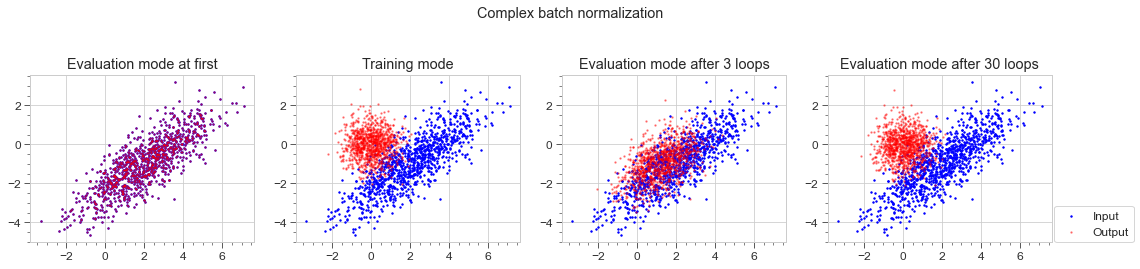

In [2]:
num_modulus = 10
num_angle = 40
num_sample = 1000
num_features = 1


batch_norm = ComplexBatchNorm(num_features).train()


fig, axes = plt.subplots(1, 4, figsize=(16, 4))

x = torch.from_numpy(np.random.multivariate_normal([2.0, -1.0], [[3.0, 2.0], [2.0, 2.0]], size=1000).astype(np.float32))
x_r, x_i = x[:, 0, None], x[:, 1, None]
x = real_to_cmplx(x_r, x_i, dim=1)

batch_norm.eval()
y_r, y_i = cmplx_to_real(batch_norm(x), dim=1)
axes[0].set_aspect('equal', adjustable='box')
axes[0].scatter(x_r.detach().cpu().numpy(), x_i.detach().cpu().numpy(), color='#0000ff', s=2)
axes[0].scatter(y_r.detach().cpu().numpy(), y_i.detach().cpu().numpy(), color='#ff000066', s=2)
axes[0].set(title='Evaluation mode at first')

batch_norm.train()
for _ in range(3):
    y_r, y_i = cmplx_to_real(batch_norm(x), dim=1)
axes[1].set_aspect('equal', adjustable='box')
axes[1].scatter(x_r.detach().cpu().numpy(), x_i.detach().cpu().numpy(), color='#0000ff', s=2)
axes[1].scatter(y_r.detach().cpu().numpy(), y_i.detach().cpu().numpy(), color='#ff000066', s=2)
axes[1].set(title='Training mode')

batch_norm.eval()
y_r, y_i = cmplx_to_real(batch_norm(x), dim=1)
axes[2].set_aspect('equal', adjustable='box')
axes[2].scatter(x_r.detach().cpu().numpy(), x_i.detach().cpu().numpy(), color='#0000ff', s=2)
axes[2].scatter(y_r.detach().cpu().numpy(), y_i.detach().cpu().numpy(), color='#ff000066', s=2)
axes[2].set(title='Evaluation mode after 3 loops')

batch_norm.train()
for _ in range(27):
    y_r, y_i = cmplx_to_real(batch_norm(x), dim=1)
batch_norm.eval()
y_r, y_i = cmplx_to_real(batch_norm(x), dim=1)
axes[3].set_aspect('equal', adjustable='box')
axes[3].scatter(x_r.detach().cpu().numpy(), x_i.detach().cpu().numpy(), color='#0000ff', s=2, label='Input')
axes[3].scatter(y_r.detach().cpu().numpy(), y_i.detach().cpu().numpy(), color='#ff000066', s=2, label='Output')
axes[3].set(title='Evaluation mode after 30 loops')
axes[3].legend(loc=(1.01, 0), frameon=True)

fig.suptitle('Complex batch normalization')
fig.tight_layout()

### Check learnability

In [3]:
batch_norm = ComplexBatchNorm(num_features).train()
print('Initial state\n')
print('running_mean:', batch_norm.running_mean)
print('running_V_rr:', batch_norm.running_V_rr)
print('running_V_ri:', batch_norm.running_V_ri)
print('running_V_ii:', batch_norm.running_V_ii)
print('num_batches_tracked:', batch_norm.num_batches_tracked)
print('W_rr.grad:', batch_norm.W_rr.grad)
print('W_ri.grad:', batch_norm.W_ri.grad)
print('W_ii.grad:', batch_norm.W_ii.grad)
print('bias.grad:', batch_norm.bias.grad)

Initial state

running_mean: tensor([0., 0.])
running_V_rr: tensor([0.5000])
running_V_ri: tensor([0.])
running_V_ii: tensor([0.5000])
num_batches_tracked: tensor(0)
W_rr.grad: None
W_ri.grad: None
W_ii.grad: None
bias.grad: None


In [4]:
batch_norm = ComplexBatchNorm(num_features).train()
batch_norm(x).sum().backward()
batch_norm.W_rr.grad
print('After one backward\n')
print('running_mean:', batch_norm.running_mean)
print('running_V_rr:', batch_norm.running_V_rr)
print('running_V_ri:', batch_norm.running_V_ri)
print('running_V_ii:', batch_norm.running_V_ii)
print('num_batches_tracked:', batch_norm.num_batches_tracked)
print('W_rr.grad:', batch_norm.W_rr.grad)
print('W_ri.grad:', batch_norm.W_ri.grad)
print('W_ii.grad:', batch_norm.W_ii.grad)
print('bias.grad:', batch_norm.bias.grad)

After one backward

running_mean: tensor([ 0.2018, -0.0975])
running_V_rr: tensor([0.7424])
running_V_ri: tensor([0.1891])
running_V_ii: tensor([0.6357])
num_batches_tracked: tensor(1)
W_rr.grad: tensor([-8.1429e-05])
W_ri.grad: tensor([-4.3370e-06])
W_ii.grad: tensor([7.7092e-05])
bias.grad: tensor([1000., 1000.])


***
*End*